# Radioactive Decay
Example 1.1-1.3 from Computational Physics, 2ed, by Giordani and Nakanishi.

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt



Given a time $t$, characteristic decay time $\tau$, and a number of atoms $N_u$ to start with, we can estimate the number of nuclear decays per a given time step:
$$ N_u(t+\Delta t) = N_u(t) - \frac{N_u(t)}{\tau}\Delta t $$

Once we calculate this value once, we can then use that new value to repeat the calculation and see how many atoms are left one time step later. We'll do this via a for loop that iterates over a set number of time and time steps, for a certain number of initial atoms to start with.

I'll start with the textbook example, using a characteristic time of 1 for simplicity.

In [10]:
# Define parameters for the radioactive decay equation from textbook
tau = 1
dt = 0.1 # check every tenth of a second
n_steps = 100 # 10 seconds 

In [22]:
# Intitialize arrays
t = np.zeros(n_steps + 1) # add one entry to store initial conditions
N = np.zeros(n_steps + 1)

# Set the starting time and initial number of atoms
t[0] = 0.0 
N[0] = 100 

# Loop through each entry in the time and number arrays
for i in range(n_steps): 
    N[i+1] = N[i] - (N[i]/tau)*dt # calculate new number of atoms
    t[i+1] = t[i] + dt # calculate new time

# Print out the number of atoms decayed, and the time elapsed
atoms_decayed = N[0] - N[-1]
time_elapsed = t[-1] - t[0]
print("Estimated number of atoms decayed: {:.10}".format(atoms_decayed), "in {:1}".format(time_elapsed), "seconds")

Estimated number of atoms decayed: 99.99734386 in 9.99999999999998 seconds


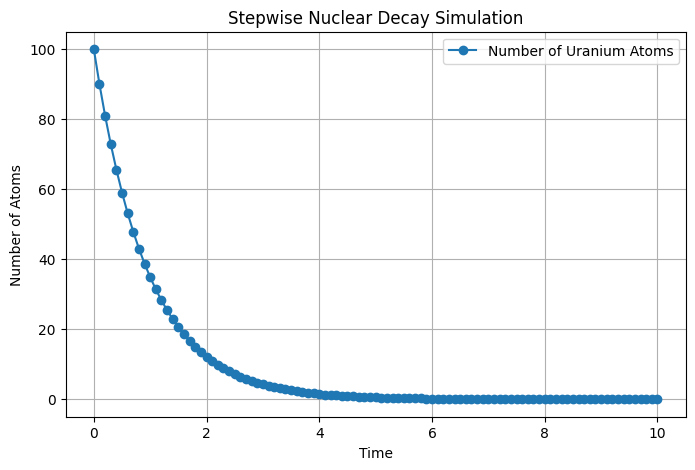

In [12]:
# Plot a figure that shows number of atoms left over time
plt.figure(figsize=(8, 5))
plt.plot(t, N, 'o-', label='Number of Uranium Atoms')
plt.xlabel('Time')
plt.ylabel('Number of Atoms')
plt.title('Stepwise Nuclear Decay Simulation')
plt.legend()
plt.grid(True)
plt.show()

I'd like to experiment to see how the accuracy of the Euler integration changes with different time steps, but I don't want to have to recreate the loop over and over so I'll just define a function here. 

In [13]:
def simulate_decay(N0, tau, dt, n_steps):

    # Initialize arrays
    t = np.zeros(n_steps + 1)
    N = np.zeros(n_steps + 1)
    
    # Set the initial conditions as defined in function
    t[0] = 0.0
    N[0] = N0
    
    # Perform the Euler integration for each time step
    for i in range(n_steps):
        # Update the number of atoms
        N[i + 1] = N[i] - (N[i] / tau) * dt
        # Update the time
        t[i + 1] = t[i] + dt
        
    # Calculate the total number of atoms decayed
    atoms_decayed = N0 - N[-1]

    # Return the arrays for time, number of atoms left, and atoms decayed
    return t, N, atoms_decayed

Now we'll use this function to run a series of calculations with different time steps.

In [14]:
# Define new variables for other timesteps
dt1 = 1
dt05=0.5
dt01=0.1
dt001=0.001

# Set number of starting atoms
N0 = 100

In [15]:
# Run the calculation function with each timestep, adjusting number of steps so we cover the same time period
t_1, N_1, atoms_decayed_1 = simulate_decay(N0, tau, dt1, n_steps)
t_05, N_05, atoms_decayed_05 = simulate_decay(N0, tau, dt05, n_steps*5)
t_01, N_01, atoms_decayed_01 = simulate_decay(N0, tau, dt01, n_steps*10)
t_001, N_001, atoms_decayed_001 = simulate_decay(N0, tau, dt001, n_steps*100)

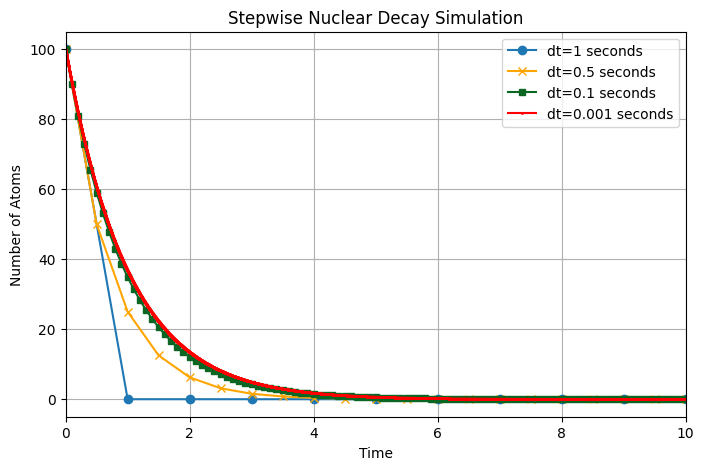

In [16]:
# Plot all the timesteps to see how it gets more precise over time
plt.figure(figsize=(8, 5))

plt.plot(t_1, N_1, 'o-', label='dt=1 seconds')
plt.plot(t_05, N_05, 'x-', label='dt=0.5 seconds', color='orange')
plt.plot(t_01, N_01, 's-', label='dt=0.1 seconds', color='#0B6623', markersize=5)
plt.plot(t_001, N_001, '^-', label='dt=0.001 seconds', color='red', alpha=1, markersize=1)

plt.xlabel('Time')
plt.xlim(0,10)
plt.ylabel('Number of Atoms')
plt.title('Stepwise Nuclear Decay Simulation')
plt.legend()
plt.grid(True)

plt.show()

So we can see that the usefulness of the extra timesteps is not getting us that much closer to the theoretical prediction. Depending on need for precision, it may not be worth the compuational expense. 